<a href="https://colab.research.google.com/github/alfredwisana/DPV/blob/main/Practical%203/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('job_performance.xlsx')

df.head()

,GRIP,ARM,RATINGS,SIMS
0,105.5,80.5,31.8,1.18
1,106.5,93.0,39.8,0.94
2,94.0,81.0,46.8,0.84
3,90.5,33.5,52.2,-2.45
4,104.0,47.5,31.2,1.00


| Field         | Description                                              |
|---------------|----------------------------------------------------------|
| *GRIP* | Unique Employee Grip Power                               |
| *ARM*    | Employee Arm Streght                               |
| *RATINGS*      | Employee Rating given by the higher up                                           |
| *SIMS*         | Employee Score in simulation test                                                      |


In [3]:
# data summary

df.describe()

,GRIP,ARM,RATINGS,SIMS
count,147.000000,147.000000,147.000000,147.000000
mean,110.231293,78.751701,41.009878,0.201769
std,23.629871,21.109335,8.521865,1.678974
min,29.000000,19.000000,21.600000,-4.170000
25%,94.000000,64.500000,34.800000,-0.965000
50%,111.000000,81.500000,41.300000,0.160000
75%,124.500000,94.000000,47.700000,1.070000
max,189.000000,132.000000,57.200000,5.170000


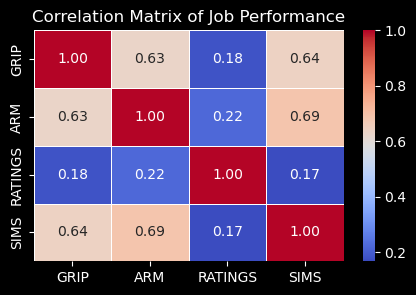

In [4]:
# correlation matrix


# Select only numeric columns for correlation analysis
numeric_data = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Job Performance')
plt.show()

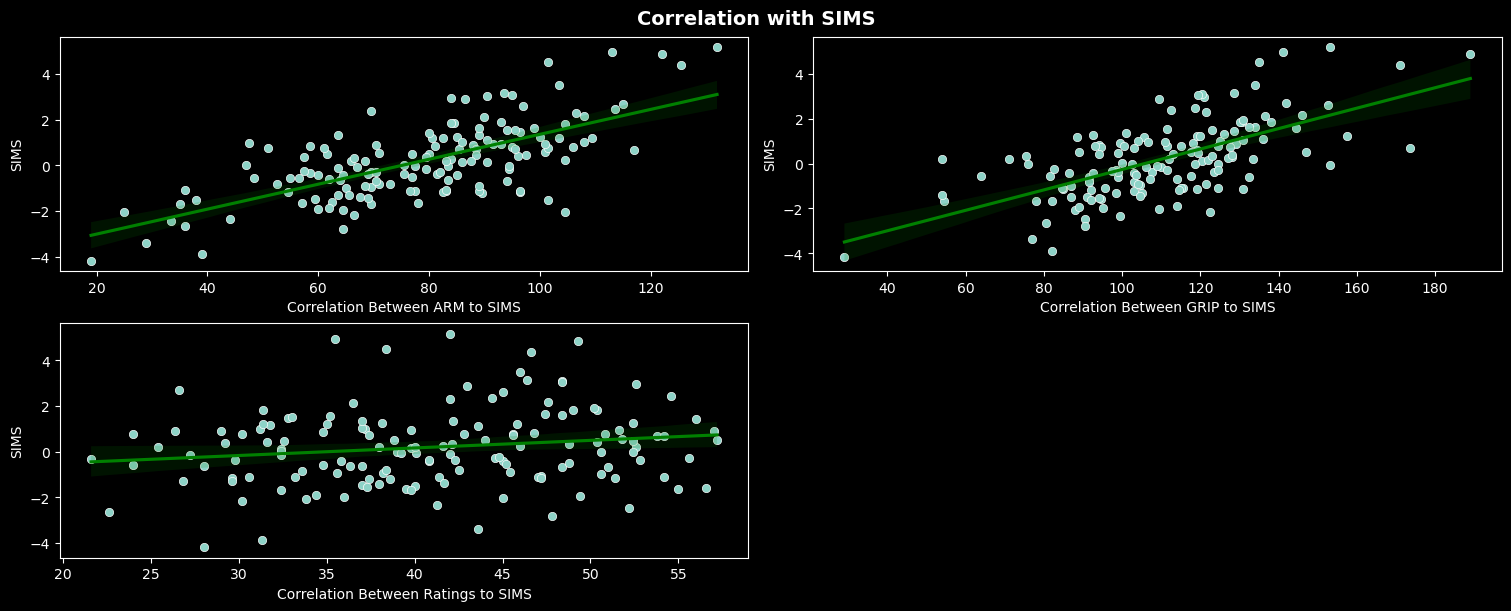

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, constrained_layout = True)
fig.set_figheight(6)
fig.set_figwidth(15)

# difference == hue
sns.scatterplot(data=df,x='ARM',y='SIMS',ax=ax[0,0])
sns.regplot(x='ARM', y='SIMS', data=df, scatter=False, color='green',ax=ax[0,0])
ax[0,0].set_xlabel('Correlation Between ARM to SIMS')

sns.scatterplot(data=df,x='GRIP',y='SIMS',ax=ax[0,1])
sns.regplot(x='GRIP', y='SIMS', data=df, scatter=False, color='green',ax=ax[0,1])
ax[0,1].set_xlabel('Correlation Between GRIP to SIMS')

sns.scatterplot(data=df,x='RATINGS',y='SIMS',ax=ax[1,0])
sns.regplot(x='RATINGS', y='SIMS', data=df, scatter=False, color='green',ax=ax[1,0])
ax[1,0].set_xlabel('Correlation Between Ratings to SIMS')

ax[1, 1].axis('off')


plt.suptitle('Correlation with SIMS', fontsize=14, fontweight='bold')
plt.show()

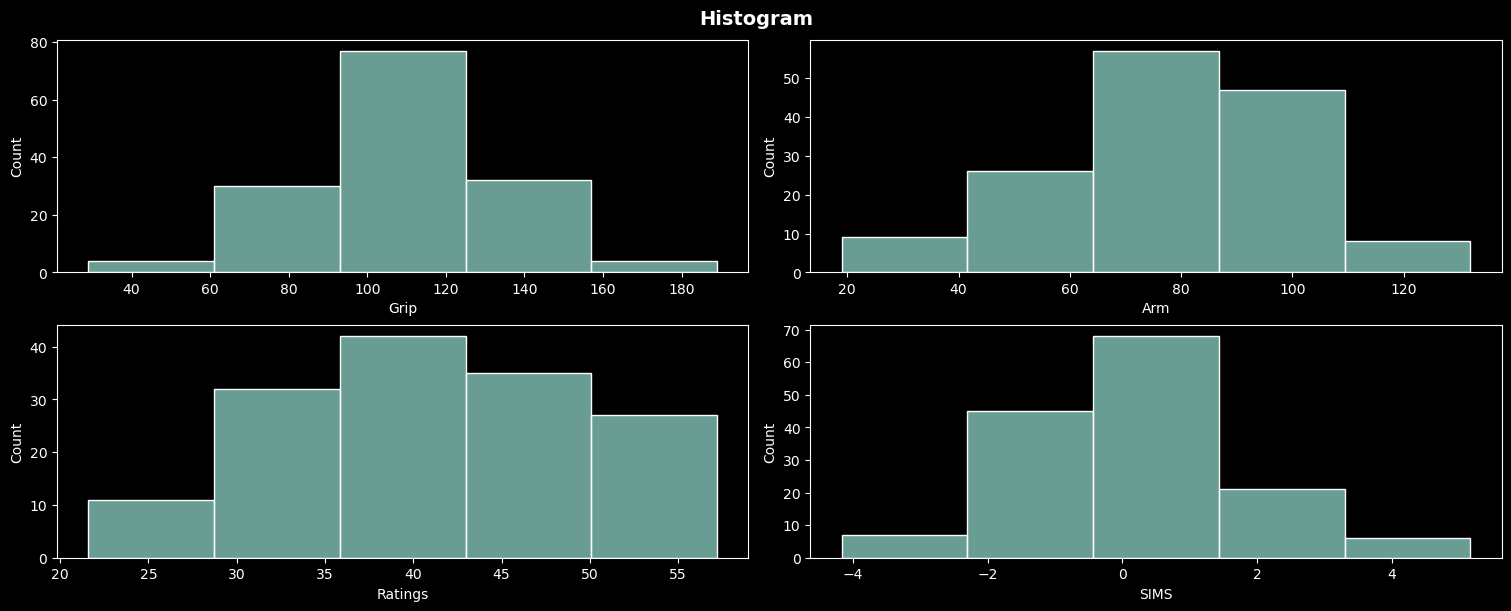

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, constrained_layout = True)
fig.set_figheight(6)
fig.set_figwidth(15)

# difference == hue
sns.histplot(df, x='GRIP',bins=5, stat='count', ax=ax[0,0])
ax[0,0].set_xlabel('Grip')
sns.histplot(df, x='ARM', bins=5, stat='count', ax=ax[0,1])
ax[0,1].set_xlabel('Arm')
sns.histplot(df, x='RATINGS', bins=5, stat='count', ax=ax[1,0])
ax[1,0].set_xlabel('Ratings')
sns.histplot(df, x='SIMS', bins=5, stat='count', ax=ax[1,1])
ax[1,1].set_xlabel('SIMS')

plt.suptitle('Histogram', fontsize=14, fontweight='bold')
plt.show()

In [7]:
# Make Quintile of data to categorize the data
quintiles = df['GRIP'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])

def classify_grip(grip):
    if grip <= quintiles.iloc[0]:
        return '1'
    elif grip <= quintiles.iloc[1]:
        return '2'
    elif grip <= quintiles.iloc[2]:
        return '3'
    elif grip <= quintiles.iloc[3]:
        return '4'
    else:
        return '5'

df['GRIP_Quintile'] = df['GRIP'].apply(classify_grip)

print('Grip Streght Quintile')
for i in range (0,len(quintiles)):
    print("Quintile %d = %g"%(i+1, quintiles.iloc[i]))


Grip Streght Quintile
Quintile 1 = 91.6
Quintile 2 = 103.7
Quintile 3 = 117.8
Quintile 4 = 128.4
Quintile 5 = 189


In [8]:
# Make Quintile of data to categorize the data
quintiles = df['ARM'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])

df['ARM_Quintile'] = df['ARM'].apply(classify_grip)

print('Arm Streght Quintile')

for i in range (0,len(quintiles)):
    print("Quintile %d = %g"%(i+1, quintiles.iloc[i]))


Arm Streght Quintile
Quintile 1 = 62.1
Quintile 2 = 74
Quintile 3 = 85.3
Quintile 4 = 95.9
Quintile 5 = 132


| Category          | Category Name                                              |
|---------------|----------------------------------------------------------|
| *1* | Weakest                               |
| *2*    | Weak                               |
| *3*      | Moderate                    |
| *4*         | Strong                                                      |
|*5* | Strongest


In [9]:
df.head(10)

,GRIP,ARM,RATINGS,SIMS,GRIP_Quintile,ARM_Quintile
0,105.5,80.5,31.8,1.18,3,3
1,106.5,93.0,39.8,0.94,3,4
2,94.0,81.0,46.8,0.84,2,3
3,90.5,33.5,52.2,-2.45,1,1
4,104.0,47.5,31.2,1.00,3,1
5,171.0,125.5,46.6,4.38,5,5
6,107.5,81.5,29.8,-0.38,3,3
7,124.5,83.5,39.0,-0.01,4,3
8,87.0,65.0,50.6,-0.99,1,2
9,102.5,77.5,40.1,-0.04,2,3


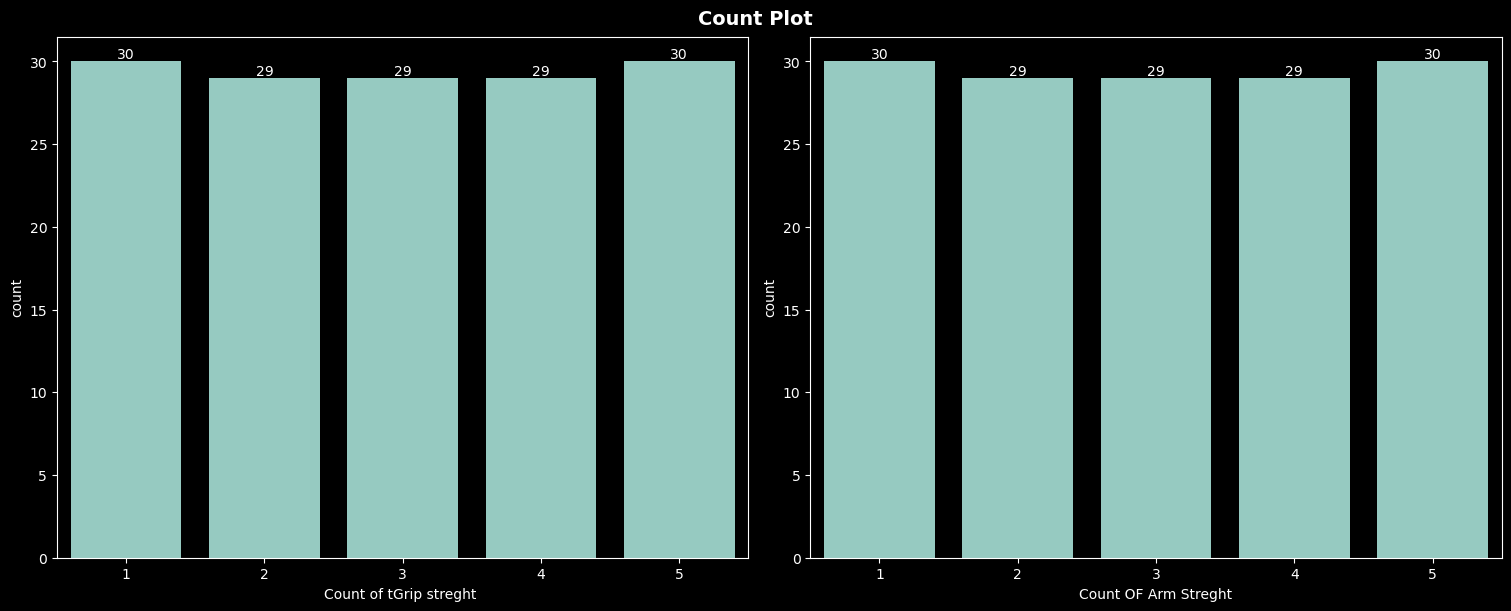

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, constrained_layout = True)
fig.set_figheight(6)
fig.set_figwidth(15)

# difference == hue
sns.countplot(df, x='GRIP_Quintile', stat='count', ax=ax[0],order=sorted(df['GRIP_Quintile']))
ax[0].set_xlabel('Count of tGrip streght ')

for container in ax[0].containers:
    ax[0].bar_label(container)

sns.countplot(df, x='ARM_Quintile',ax=ax[1],stat='count',order=sorted(df['ARM_Quintile']))
ax[1].set_xlabel('Count OF Arm Streght')
for container in ax[1].containers:
    ax[1].bar_label(container)



plt.suptitle('Count Plot', fontsize=14, fontweight='bold')
plt.show()

In [11]:
sorted_df = df.sort_values(by=['SIMS','ARM_Quintile','GRIP_Quintile','RATINGS'])
sorted_df.reset_index(drop=False).head(30)

,index,GRIP,ARM,RATINGS,SIMS,GRIP_Quintile,ARM_Quintile
0,117,29.0,19.0,28.0,-4.17,1,1
1,28,82.0,39.0,31.3,-3.88,1,1
2,65,77.0,29.0,43.6,-3.38,1,1
3,104,90.5,64.5,47.8,-2.79,1,2
4,71,80.5,36.0,22.6,-2.65,1,1
5,3,90.5,33.5,52.2,-2.45,1,1
6,48,99.5,44.0,41.3,-2.34,2,1
7,32,122.5,66.5,30.2,-2.17,4,2
8,33,88.0,25.0,33.8,-2.05,1,1
9,62,109.5,104.5,45.0,-2.04,3,5
